In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 훈련 세트와 테스트 세트
- 테스트 세트 : 평가에 사용하는 데이터
- 훈련 세트 : 훈련에 사용하는 데이터

먼저 도미와 빙어의 데이터를 합쳐 하나의 파이썬 리스트로 준비한다. 
- http://bit.ly/bream_smelt

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

이제 두 파이썬 리스트를 순회하면서 각 생선의 길이와 무게를 하나의 리스트로 담은 2차원 리스트를 만들자. 

In [ ]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

하나의 생선 데이터를 **샘플**이라고 부른다. <br>
도미와 빙어는 각각 35마리, 14마리가 있으므로, 전체 데이터는 49개의 샘플이 있다.

사용하는 특성은 길이와 무게 2개이다. 이 데이터의 처음 35개를 훈련 세트로, <br>
나머지 14개를 테스트 세트로 사용한다. 

In [ ]:
fish_target = [1] * 35 + [0] * 14

먼저 사이킷런의 KNeighborsClassifier 클래스를 import하고 모델 객체를 만든다. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

전체 데이터에서 처음 35개를 생성해야 한다. 일반적으로 리스트처럼 배열의 요소를 선택할 때는 <br>
배열의 위치, 즉 **인덱스**를 사용한다.

In [ ]:
print(fish_data[4])

[29.0, 430.0]


생선 데이터에서 처음 35개를 훈련 데이터로 사용하고, 나머지 14개를 테스트 데이터로 사용한다. 

In [ ]:
# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]

# 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]

# 테스트 세트로 입력값 중 35번째부터 마지막까지 사용
test_input = fish_data[35:]

# 세스트 세트로 타깃값 중 35번째부터 마지막까지 사용 
test_target = fish_target[35:]

In [ ]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target) # 왜 0이지 ,,,??? 

0.0

## 샘플링 편향 
- 0부터 35까지는 도미 데이터, 빙어는 하나도 없다.


- 따라서 도미 데이터만 학습하고, 빙어 데이터로만 테스트를 한 것이니 
- 당연히 score = 0이 뜰 수밖에 없다 

- 샘플링이 한 쪽으로 치우쳤다는 의미로 샘플링 편향이라고 부른다. 

- 전체 데이터와 타겟을 섞은 다음, 훈련 세트와 테스트 세트를 나눠서 학습 후 테스트해야 한다.
- 이런 작품을 간편하게 처리할 수 있도록 파이썬 라이브러리인 넘파이를 사용할 것이다. 

In [ ]:
# 파이썬 리스트를 넘파이 배열로 바꾸자.

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [ ]:
input_arr[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [ ]:
type(input_arr)

numpy.ndarray

In [ ]:
print(input_arr.shape)

(49, 2)


In [ ]:
# 일정한 결과를 얻으려면 초기에 랜덤 시드를 설정 
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


넘파이의 배열 인덱싱 : 
- 1개의 인덱스가 아닌 여러 개의 인덱스로 한 번에 여러 개의 원소를 선택 가능 
- 예 ) 다음과 같이 input_arr에서 두 번째와 네 번째 샘플을 선택하여 출력 가능 

In [ ]:
print(input_arr[[1, 3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


In [ ]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

# 무조건 파이썬 리스트를 numpy array로 변환한 후 처리해야 한다. 

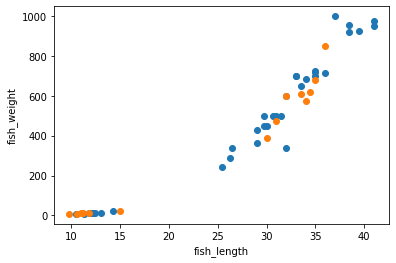

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('fish_length')
plt.ylabel('fish_weight')
plt.show()

앞서 만든 훈련 세트와 테스트 세트로 k-최근접 이웃 모델을 훈련시켜 보자.
- fit() 메서드를 실행할 때마다 KNeighborClassifier 클래스의 객체는 <br>
이전에 학습한 모든 것을 잃어버린다.
- 이전 모델을 그대로 두고 싶다면 KNeighborsClassifier 클래스 객체를 새로 만들어야 한다.
- 이전에 만든 kn 객체는 의미가 없으므로 그대로 사용하자. 

In [ ]:
kn = kn.fit(train_input, train_target)

In [ ]:
kn.score(test_input, test_target)

1.0

In [ ]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])